In [14]:
import os
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, \
    Dropout, BatchNormalization
from tensorflow.keras.optimizers.legacy import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from PIL import Image

In [15]:
# --- Part 1: Model Training ---

# Initialize the training data generator with augmentation
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [16]:
# Specify the directory with training data
train_dir = '/Users/jocksolo/Downloads/dogs-vs-cats/train'

In [17]:
# Prepare the data generator for training
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(200, 200),
    batch_size=20,
    class_mode='binary')

Found 25000 images belonging to 2 classes.


In [18]:
# Define the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(200, 200, 3)),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    Dropout(0.25),

    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    Dropout(0.25),

    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    Dropout(0.25),

    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    Dropout(0.25),

    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

In [19]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy',
              metrics=['accuracy'])

In [20]:
# Train the model
history = model.fit(
    train_generator,
    epochs=20)

Epoch 1/20
1250/1250 [==============================] - 394s 315ms/step - loss: 0.9031 - accuracy: 0.6070
Epoch 2/20
1250/1250 [==============================] - 367s 293ms/step - loss: 0.6201 - accuracy: 0.6582
Epoch 3/20
1250/1250 [==============================] - 336s 269ms/step - loss: 0.5844 - accuracy: 0.6927
Epoch 4/20
1250/1250 [==============================] - 321s 257ms/step - loss: 0.5479 - accuracy: 0.7286
Epoch 5/20
1250/1250 [==============================] - 319s 255ms/step - loss: 0.5092 - accuracy: 0.7610
Epoch 6/20
1250/1250 [==============================] - 321s 257ms/step - loss: 0.4622 - accuracy: 0.7908
Epoch 7/20
1250/1250 [==============================] - 1882s 2s/step - loss: 0.4384 - accuracy: 0.8024
Epoch 8/20
1250/1250 [==============================] - 324s 259ms/step - loss: 0.4036 - accuracy: 0.8213
Epoch 9/20
1250/1250 [==============================] - 324s 259ms/step - loss: 0.3935 - accuracy: 0.8283
Epoch 10/20
1250/1250 [=========================

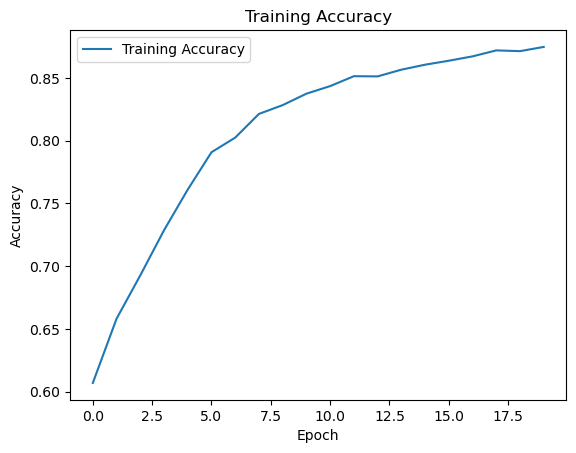

In [22]:
import matplotlib.pyplot as plt

# Plot training accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.title('Training Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

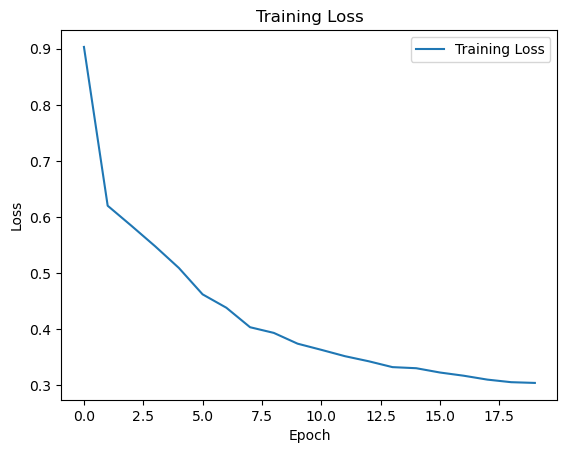

In [23]:
# Plot training loss
plt.plot(history.history['loss'], label='Training Loss')
plt.title('Training Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()

In [24]:
# --- Part 2: Manual Test Data Preprocessing and Prediction ---

# Test directory containing images without subdirectories
test_dir = '/Users/jocksolo/Downloads/dogs-vs-cats/test1'

test_files = [os.path.join(test_dir, f) for f in os.listdir(test_dir) if
              f.lower().endswith('.jpg')]

test_images = []

for file_path in test_files:
    img = image.load_img(file_path, target_size=(200, 200))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Shape (1, 200, 200, 3)
    test_images.append(img_array)

In [25]:
# Stack up images list to pass for prediction
test_images = np.vstack(test_images)

predictions = model.predict(test_images, batch_size=20)

625/625 [==============================] - 41s 66ms/step


In [26]:
# Assuming binary classification with 'Dog' as class 1 and 'Cat' as class 0
predicted_classes = predictions > 0.5

# Print file path and predicted class
for file_path, predicted_class in zip(test_files, predicted_classes):
    print(f"{file_path}: {'Dog' if predicted_class[0] else 'Cat'}")

/Users/jocksolo/Downloads/dogs-vs-cats/test1/9733.jpg: Cat
/Users/jocksolo/Downloads/dogs-vs-cats/test1/63.jpg: Cat
/Users/jocksolo/Downloads/dogs-vs-cats/test1/6400.jpg: Dog
/Users/jocksolo/Downloads/dogs-vs-cats/test1/823.jpg: Dog
/Users/jocksolo/Downloads/dogs-vs-cats/test1/4217.jpg: Cat
/Users/jocksolo/Downloads/dogs-vs-cats/test1/3578.jpg: Cat
/Users/jocksolo/Downloads/dogs-vs-cats/test1/10321.jpg: Dog
/Users/jocksolo/Downloads/dogs-vs-cats/test1/2666.jpg: Dog
/Users/jocksolo/Downloads/dogs-vs-cats/test1/5109.jpg: Cat
/Users/jocksolo/Downloads/dogs-vs-cats/test1/11981.jpg: Cat
/Users/jocksolo/Downloads/dogs-vs-cats/test1/10447.jpg: Dog
/Users/jocksolo/Downloads/dogs-vs-cats/test1/2100.jpg: Cat
/Users/jocksolo/Downloads/dogs-vs-cats/test1/11759.jpg: Cat
/Users/jocksolo/Downloads/dogs-vs-cats/test1/4571.jpg: Dog
/Users/jocksolo/Downloads/dogs-vs-cats/test1/7078.jpg: Dog
/Users/jocksolo/Downloads/dogs-vs-cats/test1/12250.jpg: Dog
/Users/jocksolo/Downloads/dogs-vs-cats/test1/1409.jpg:

In [27]:
model.save('/Users/jocksolo/models/cats-dogs-classifier')


INFO:tensorflow:Assets written to: /Users/jocksolo/models/cats-dogs-classifier/assets


INFO:tensorflow:Assets written to: /Users/jocksolo/models/cats-dogs-classifier/assets
